# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [24]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(len(cities))



616


In [3]:
# Save config information from openweather url.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# set up lists to hold reponse info that will be used in a DataFrame
lat = []
lon = []
temp = []
windspeed =[]
hum = []
cloud = []
dt = []
country = []
city_name = []

# Loop through the list of cities and perform a request for data on each
for i,city in enumerate(cities):

    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        windspeed.append((response['wind']['speed']))
        cloud.append(response['clouds']['all'])
        dt.append(response['dt'])
        country.append(response['sys']['country'])
        city_name.append(city)
        print(f"Processing record {i} | {city}")
    except:
     
        print("City not found")

Processing record 0 | busselton
Processing record 1 | coquimbo
City not found
Processing record 3 | pandan
Processing record 4 | husavik
Processing record 5 | albany
Processing record 6 | jardim
Processing record 7 | vaini
Processing record 8 | dikson
Processing record 9 | eirunepe
City not found
Processing record 11 | mataura
Processing record 12 | barra
Processing record 13 | wembley
Processing record 14 | victoria
Processing record 15 | saint-philippe
City not found
Processing record 17 | qaanaaq
Processing record 18 | waidhofen
Processing record 19 | bluff
Processing record 20 | rikitea
Processing record 21 | ushuaia
Processing record 22 | punta arenas
Processing record 23 | kandrian
Processing record 24 | sayyan
Processing record 25 | cape town
Processing record 26 | stryn
City not found
Processing record 28 | saint-pierre
Processing record 29 | jamestown
Processing record 30 | mar del plata
Processing record 31 | saldanha
Processing record 32 | new norfolk
Processing record 33 | 

Processing record 260 | ingham
Processing record 261 | general roca
Processing record 262 | talcahuano
Processing record 263 | georgetown
Processing record 264 | kyabe
Processing record 265 | pisco
City not found
Processing record 267 | mahalingpur
Processing record 268 | matagami
City not found
Processing record 270 | salaverry
City not found
Processing record 272 | inverness
Processing record 273 | majene
Processing record 274 | alice springs
Processing record 275 | vredendal
Processing record 276 | aprelevka
Processing record 277 | myitkyina
Processing record 278 | pangnirtung
Processing record 279 | gat
Processing record 280 | lodja
Processing record 281 | porto novo
City not found
Processing record 283 | ossora
City not found
Processing record 285 | tijara
Processing record 286 | mahibadhoo
Processing record 287 | sulangan
Processing record 288 | kaitangata
Processing record 289 | kavieng
Processing record 290 | walvis bay
Processing record 291 | cidreira
Processing record 292 | k

Processing record 519 | whitefish
Processing record 520 | altay
Processing record 521 | cap-aux-meules
Processing record 522 | sabha
Processing record 523 | sao felix do xingu
Processing record 524 | beyneu
Processing record 525 | binabalian
Processing record 526 | neuquen
Processing record 527 | hofn
Processing record 528 | kapit
Processing record 529 | high level
Processing record 530 | sao gabriel da cachoeira
Processing record 531 | ilulissat
Processing record 532 | mocuba
Processing record 533 | mount isa
Processing record 534 | worland
Processing record 535 | imeni poliny osipenko
Processing record 536 | ust-kuyga
Processing record 537 | mehamn
Processing record 538 | kismayo
Processing record 539 | port elizabeth
Processing record 540 | dauphin
City not found
Processing record 542 | serrinha
Processing record 543 | talnakh
Processing record 544 | burgeo
Processing record 545 | trelew
Processing record 546 | high prairie
City not found
Processing record 548 | qandala
Processing r

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
# Converting raw data to a DataFrame
weather_df = pd.DataFrame({"City":city_name,
             "Lat":lat,
             "Lng":lon,
             "Max Temp":temp,
             "Humidity":hum,
             "Cloudiness":cloud,
             "Wind Speed":windspeed,
             "Country":country,
             "Date":dt
             })


In [9]:
#Exporting the DataFrame weather_df in a csv file and reading the DataFrame
weather_df.to_csv("weather.csv")
weather_df.head() 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,63.19,71,0,7.36,AU,1616888878
1,coquimbo,-29.9533,-71.3436,59.00,88,75,9.22,CL,1616888879
2,pandan,14.0453,124.1694,80.26,83,84,8.03,PH,1616888880
3,husavik,66.0449,-17.3389,19.40,86,90,13.80,IS,1616888881
4,albany,42.6001,-73.9662,54.00,56,79,1.90,US,1616888882


In [10]:
# A summary statistics was displayed
summary_df = weather_df[["Lat","Lng","Max Temp", "Humidity","Cloudiness","Wind Speed", "Date"]].describe()
summary_df.to_csv("summary.csv")
summary_df

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,565.000000,565.000000,565.000000,565.000000,565.000000,565.000000,5.650000e+02
mean,19.958908,13.665167,56.091310,72.638938,53.180531,8.272938,1.616889e+09
std,33.940462,91.209238,24.800526,22.001142,38.582820,6.664107,1.180260e+02
min,-54.800000,-179.166700,-30.240000,3.000000,0.000000,0.070000,1.616889e+09
25%,-8.466700,-65.880200,41.000000,62.000000,13.000000,3.440000,1.616889e+09
50%,24.144700,17.947900,63.000000,78.000000,63.000000,6.420000,1.616889e+09
75%,49.783400,97.400000,76.530000,89.000000,90.000000,11.500000,1.616889e+09
max,78.218600,179.316700,89.600000,100.000000,100.000000,43.730000,1.616889e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [11]:
weather_df.loc[weather_df["Humidity"]>100]


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [9]:
# As no city was listed with humidity >100%, this step will be skipped.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

This chart shows how latitude influences the temperature. The Southern Hemispher is warmer than the Northern. Cities with latitude -40 to -60 in the Southern Hemisphere are way warmer than cities with Latitude 40 to 60 in the Northern Hemisphere.


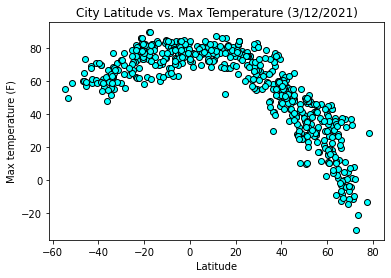

In [13]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Max Temp"]
plt.title("City Latitude vs. Max Temperature (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Max temperature (F)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the temperature. The Southern Hemispher is warmer than the Northern. Cities with latitude -40 to -60 in the Southern Hemisphere are way warmer than cities with Latitude 40 to 60 in the Northern Hemisphere.")

#Latitude vs. Humidity Plot

This chart shows how latitude influences the humidity. We can see that humidity around 20% or lower are found in latitudes between 0 -40, which are in the Northern Hemisfere, but very close to the Equatorial line.  


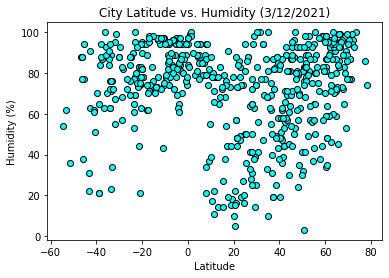

In [14]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Humidity"]
plt.title("City Latitude vs. Humidity (3/12/2021)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the humidity. We can see that humidity around 20% or lower are found in latitudes between 0 -40, which are in the Northern Hemisfere, but very close to the Equatorial line.  ")

##### Latitude vs. Cloudiness Plot

This chart shows how latitude influences the cloudiness. We can see that there is not that much relation between those two parameters.  


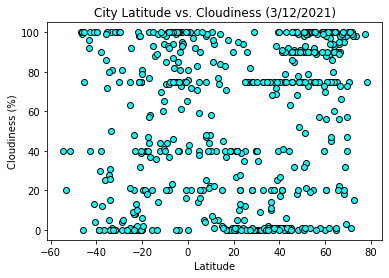

In [15]:

x_axis = weather_df["Lat"]
y_axis = weather_df["Cloudiness"]
plt.title("City Latitude vs. Cloudiness (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the cloudiness. We can see that there is not that much relation between those two parameters.  ")

## Latitude vs. Wind Speed Plot

This chart shows how latitude influences the wind speed. Most of the cities from our data set has wind speed below 15 mph, but for the few cities that has higer values of wind speed, they are mostly located at the Northern Hemisphere.


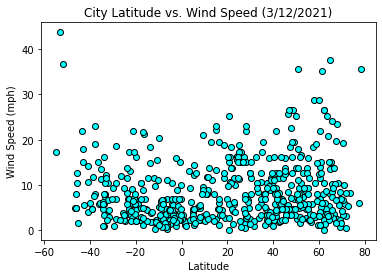

In [16]:
x_axis = weather_df["Lat"]
y_axis = weather_df["Wind Speed"]
plt.title("City Latitude vs. Wind Speed (3/12/2021)") # To ask help
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.scatter(x_axis, y_axis,marker="o", facecolors="cyan", edgecolors="black")
plt.plot()
print("This chart shows how latitude influences the wind speed. Most of the cities from our data set has wind speed below 15 mph, but for the few cities that has higer values of wind speed, they are mostly located at the Northern Hemisphere.")

## Linear Regression

In [17]:
#Separate the data in 2 dataframes to get the North and the South regions for ploting

#North ['Lat']>=0]
n_weather_df = weather_df.loc[weather_df['Lat']>=0]
n_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,pandan,14.0453,124.1694,80.26,83,84,8.03,PH,1616888880
3,husavik,66.0449,-17.3389,19.40,86,90,13.80,IS,1616888881
4,albany,42.6001,-73.9662,54.00,56,79,1.90,US,1616888882
7,dikson,73.5069,80.5464,-21.44,100,98,8.12,RU,1616888885
12,victoria,22.2855,114.1577,75.00,86,10,4.29,HK,1616888652


In [18]:
#South ['Lat']<0]
s_weather_df = weather_df.loc[weather_df['Lat']<0]
s_weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,-33.6500,115.3333,63.19,71,0,7.36,AU,1616888878
1,coquimbo,-29.9533,-71.3436,59.00,88,75,9.22,CL,1616888879
5,jardim,-21.4803,-56.1381,79.05,44,98,2.95,BR,1616888883
6,vaini,-21.2000,-175.2000,86.00,74,75,6.91,TO,1616888884
8,eirunepe,-6.6603,-69.8736,74.19,96,94,2.17,BR,1616888885


In [38]:
#Using a unic function to simplify the plotting steps
def correlation_plot(x, y,
                     title,
                     xlabel, ylabel, xmin, ymin):
    plt.scatter(x, y)
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(xmin,ymin),fontsize=14,color="red")
      
    
    print(f'r-value is = {r_value**2}')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.savefig("fig.png")
    plt.show


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is = 0.7787327961692014


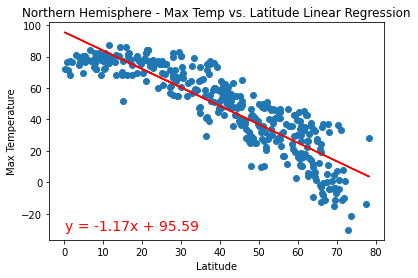

In [39]:
x = n_weather_df["Lat"]
y = n_weather_df["Max Temp"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Max Temp"].min()
title = "Northern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

r-value is = 0.40775684545210716


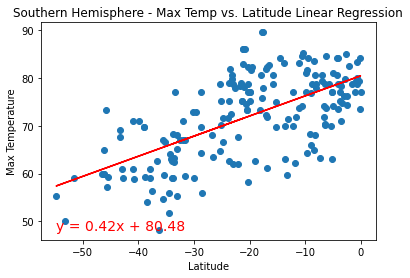

In [40]:
x = s_weather_df["Lat"]
y = s_weather_df["Max Temp"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Max Temp"].min()
title = "Southern Hemisphere - Max Temp vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Max Temperature"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is = 0.060572630828600975


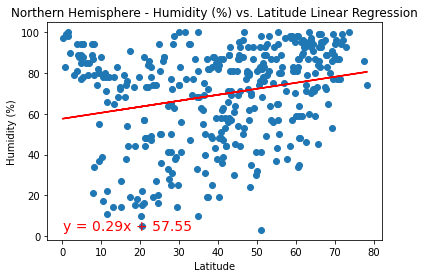

In [41]:
x = n_weather_df["Lat"]
y = n_weather_df["Humidity"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Humidity"].min()
title = "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Humidity (%)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

r-value is = 0.14123623013980172


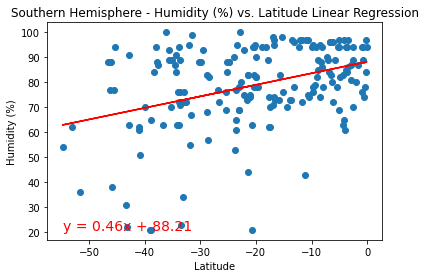

In [47]:
x = s_weather_df["Lat"]
y = s_weather_df["Humidity"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Humidity"].min()
title = "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Humidity (%)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is = 0.11972849342442361


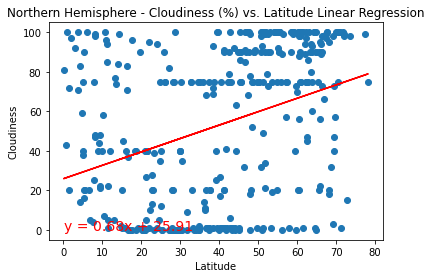

In [48]:
x = n_weather_df["Lat"]
y = n_weather_df["Cloudiness"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Cloudiness"].min()
title = "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Cloudiness"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

r-value is = 0.04968782909693393


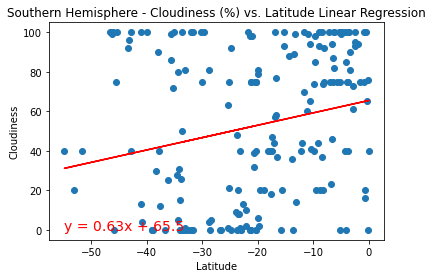

In [49]:
x = s_weather_df["Lat"]
y = s_weather_df["Cloudiness"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Cloudiness"].min()
title = "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Cloudiness"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is = 0.00979414762435413


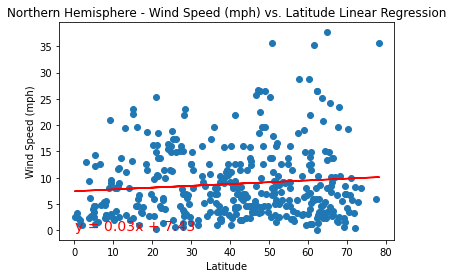

In [50]:
x = n_weather_df["Lat"]
y = n_weather_df["Wind Speed"]
xmin = n_weather_df["Lat"].min()
ymin = n_weather_df["Wind Speed"].min()
title = "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

r-value is = 0.13902670064273404


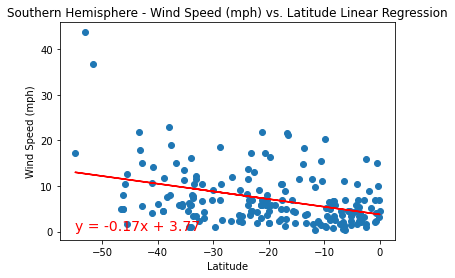

In [51]:
x = s_weather_df["Lat"]
y = s_weather_df["Wind Speed"]
xmin = s_weather_df["Lat"].min()
ymin = s_weather_df["Wind Speed"].min()
title = "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression"
xlabel = "Latitude"
ylabel = "Wind Speed (mph)"
correlation_plot(x, y, title, xlabel, ylabel, xmin, ymin)
os.rename("fig.png", "Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression.png")